In [15]:
%reset

In [16]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor

# Load and prepare data

## Load data

In [17]:
name = '20220202_baseframe.csv'
baseframe = pd.read_csv('../datasets/' + name, index_col= 'Unnamed: 0')
baseframe.head()

/var/folders/9j/v_9vz6sx163f_r6zngzszh_m0000gn/T/ipykernel_13581/645803531.py:2: DtypeWarning: Columns (242,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  baseframe = pd.read_csv('../datasets/' + name, index_col= 'Unnamed: 0')


,SERIAL_NUMBER,1282_Camera_Focus_Check,1282_Camera_Light_Check,1282_Deckel_Drehlage,1282_Dichtung_Defektflaeche,1282_Dichtung_Radius,1282_Drehzahl,1282_Gehaeusehoehe,1282_MembranMontage_Membran_Position_Abweichung,1282_MembranMontage_Membranhoehe_1,1282_MembranMontage_Membranhoehe_2,1282_MembranMontage_Membranhoehe_3,1282_MembranMontage_Membranhoehe_4,1282_Membranueberstand,1282_Planlage,1282_Prozesszeit,1282_Schweissfehler_AnzahlRisse,1282_Schweissfehler_AnzahlSchweissfehler,1282_Umdrehung,2308_End_Pos,2308_Impedanzmessung,2308_Laserleistung,2308_Laserzeit,2308_Setzweg,2308_Start_Pos,2308_Temperatur,2310_Abstand_zum_Sensor_X,2310_Abstand_zum_Sensor_Y,2310_Anteil_Al,2310_Anteil_Bl,2310_Austragsleistungl,2310_Dosierabstand_Z,2310_Dosierdrehzahl_Al,2310_Dosierdrehzahl_Bl,2310_Dosiermengel,2310_Dosiersatzl,2310_Dosierzeitl,2310_Druck_NP_max_Al,2310_Druck_NP_max_Bl,2310_Druck_NP_mean_Al,2310_Druck_NP_mean_Bl,2310_Druck_NP_min_Al,2310_Druck_NP_min_Bl,2310_Druck_VP_max_Al,2310_Druck_VP_max_Bl,2310_Druck_VP_mean_Al,2310_Druck_VP_mean_Bl,2310_Druck_VP_min_Al,2310_Druck_VP_min_Bl,2310_Fuellstand_Al,2310_Fuellstand_Bl,2310_KompNr_Al,2310_KompNr_Bl,2310_Luftbeladung_KompA,2310_Luftbeladung_KompB,2310_Luftfeuchte_Aussen,2310_Luftfeuchtigkeit_Zelle,2310_Luftgehalt_Al,2310_Luftgehalt_Bl,2310_Lufttemp_Aussen,2310_Lufttemperatur_Zelle,2310_MatExpire_Al,2310_MatExpire_Bl,2310_Materialsatzl,2310_Mischerdrehzahl,2310_TemperaturMat_A,2310_TemperaturMat_B,2310_Wiegeschussl,2312_Cp,2312_Cs,2312_Fuegeposition,2312_HirschmannCodingA0Grad_PosX,2312_HirschmannCodingA0Grad_PosY,2312_HirschmannCodingA90Grad_PosX,2312_HirschmannCodingA90Grad_PosY,2312_Kraftmessung,2312_Lp,2312_Ls,2312_ME,2312_MWE,2312_Pinpruefung_pin_piezo_left,2312_Pinpruefung_pin_piezo_right,2312_Pinpruefung_pin_plug_center,2312_Pinpruefung_pin_plug_left,2312_Pinpruefung_pin_plug_right,2312_Rp,2312_Rs,2312_SchaumhoehePins_Schaumhoehe,2312_Tau_s,2312_fs,2314_Cp,2314_Cp_OTC,2314_Cs,2314_Cs_OTC,2314_Lp,2314_Lp_OTC,2314_Ls,2314_Ls_OTC,2314_ME,2314_ME_OTC,2314_MWE,2314_MWE_OTC,2314_Rp,2314_Rp_OTC,2314_Rs,2314_Rs_OTC,2314_Tau_s,2314_delta_C_p,2314_delta_L_s,2314_delta_R_s,2314_delta_f_s,2314_delta_tau_s,2314_env__humidity,2314_env__pressure,2314_env__temp,2314_f_s_OTC,2314_fs,2314_tau_s_OTC,2324_Draht_0__Ende_In_Loetpaste_Score,2324_Draht_0__Vidi_Gesamt___Score,2324_Draht_1__Ende_In_Loetpaste_Score,2324_Draht_1__Vidi_Gesamt___Score,2324_Fremdpartikel_Anzahl,2324_FremdpartikelInMembran_AnzahlPartikel,2324_Impedanzmessung,2324_KontakthalterungHousing_AnzHomogeneStege,2324_KontakthalterungHousing_AnzPins,2324_KontakthalterungHousing_AnzRaenderStege,2324_Kontaktpins_0__Parallelitaet,2324_Kontaktpins_1__Parallelitaet,2324_Laserleistung_Loeten,2324_Laserzeit_Loeten,2324_Loetpaste_Menge,2324_Loetpastenpunkt_0__DurchmesserX,2324_Loetpastenpunkt_0__DurchmesserY,2324_Loetpastenpunkt_0__PositionX,2324_Loetpastenpunkt_0__PositionY,2324_Loetpastenpunkt_0__Taumelkreis,2324_Loetpastenpunkt_1__DurchmesserX,2324_Loetpastenpunkt_1__DurchmesserY,2324_Loetpastenpunkt_1__PositionX,2324_Loetpastenpunkt_1__PositionY,2324_Loetpastenpunkt_1__Taumelkreis,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_0,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_1,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Links,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Rechts,2324_Omega_0__Pos_0_4_Abweichung,2324_Omega_0__Pos_0_4_X,2324_Omega_0__Pos_0_4_Y,2324_Omega_0__Pos_0_6_Abweichung,2324_Omega_0__Pos_0_6_X,2324_Omega_0__Pos_0_6_Y,2324_Omega_0__Pos_0_8_Abweichung,2324_Omega_0__Pos_0_8_X,2324_Omega_0__Pos_0_8_Y,2324_Omega_1__Pos_0_4_Abweichung,2324_Omega_1__Pos_0_4_X,2324_Omega_1__Pos_0_4_Y,2324_Omega_1__Pos_0_6_Abweichung,2324_Omega_1__Pos_0_6_X,2324_Omega_1__Pos_0_6_Y,2324_Omega_1__Pos_0_8_Abweichung,2324_Omega_1__Pos_0_8_X,2324_Omega_1__Pos_0_8_Y,2324_PiezoPositionzuMembranundWinkellage_Taumelkreis,2324_PiezoPositionzuMembranundWinkellage_Winkel_Banane,2324_Pin_Setzparameter,2324_PositionPiezozuGehaeuse_PositionX,2324_PositionPi

In [18]:
baseframe[baseframe['1282_Schweissfehler_AnzahlRisse'] == 1]

,SERIAL_NUMBER,1282_Camera_Focus_Check,1282_Camera_Light_Check,1282_Deckel_Drehlage,1282_Dichtung_Defektflaeche,1282_Dichtung_Radius,1282_Drehzahl,1282_Gehaeusehoehe,1282_MembranMontage_Membran_Position_Abweichung,1282_MembranMontage_Membranhoehe_1,1282_MembranMontage_Membranhoehe_2,1282_MembranMontage_Membranhoehe_3,1282_MembranMontage_Membranhoehe_4,1282_Membranueberstand,1282_Planlage,1282_Prozesszeit,1282_Schweissfehler_AnzahlRisse,1282_Schweissfehler_AnzahlSchweissfehler,1282_Umdrehung,2308_End_Pos,2308_Impedanzmessung,2308_Laserleistung,2308_Laserzeit,2308_Setzweg,2308_Start_Pos,2308_Temperatur,2310_Abstand_zum_Sensor_X,2310_Abstand_zum_Sensor_Y,2310_Anteil_Al,2310_Anteil_Bl,2310_Austragsleistungl,2310_Dosierabstand_Z,2310_Dosierdrehzahl_Al,2310_Dosierdrehzahl_Bl,2310_Dosiermengel,2310_Dosiersatzl,2310_Dosierzeitl,2310_Druck_NP_max_Al,2310_Druck_NP_max_Bl,2310_Druck_NP_mean_Al,2310_Druck_NP_mean_Bl,2310_Druck_NP_min_Al,2310_Druck_NP_min_Bl,2310_Druck_VP_max_Al,2310_Druck_VP_max_Bl,2310_Druck_VP_mean_Al,2310_Druck_VP_mean_Bl,2310_Druck_VP_min_Al,2310_Druck_VP_min_Bl,2310_Fuellstand_Al,2310_Fuellstand_Bl,2310_KompNr_Al,2310_KompNr_Bl,2310_Luftbeladung_KompA,2310_Luftbeladung_KompB,2310_Luftfeuchte_Aussen,2310_Luftfeuchtigkeit_Zelle,2310_Luftgehalt_Al,2310_Luftgehalt_Bl,2310_Lufttemp_Aussen,2310_Lufttemperatur_Zelle,2310_MatExpire_Al,2310_MatExpire_Bl,2310_Materialsatzl,2310_Mischerdrehzahl,2310_TemperaturMat_A,2310_TemperaturMat_B,2310_Wiegeschussl,2312_Cp,2312_Cs,2312_Fuegeposition,2312_HirschmannCodingA0Grad_PosX,2312_HirschmannCodingA0Grad_PosY,2312_HirschmannCodingA90Grad_PosX,2312_HirschmannCodingA90Grad_PosY,2312_Kraftmessung,2312_Lp,2312_Ls,2312_ME,2312_MWE,2312_Pinpruefung_pin_piezo_left,2312_Pinpruefung_pin_piezo_right,2312_Pinpruefung_pin_plug_center,2312_Pinpruefung_pin_plug_left,2312_Pinpruefung_pin_plug_right,2312_Rp,2312_Rs,2312_SchaumhoehePins_Schaumhoehe,2312_Tau_s,2312_fs,2314_Cp,2314_Cp_OTC,2314_Cs,2314_Cs_OTC,2314_Lp,2314_Lp_OTC,2314_Ls,2314_Ls_OTC,2314_ME,2314_ME_OTC,2314_MWE,2314_MWE_OTC,2314_Rp,2314_Rp_OTC,2314_Rs,2314_Rs_OTC,2314_Tau_s,2314_delta_C_p,2314_delta_L_s,2314_delta_R_s,2314_delta_f_s,2314_delta_tau_s,2314_env__humidity,2314_env__pressure,2314_env__temp,2314_f_s_OTC,2314_fs,2314_tau_s_OTC,2324_Draht_0__Ende_In_Loetpaste_Score,2324_Draht_0__Vidi_Gesamt___Score,2324_Draht_1__Ende_In_Loetpaste_Score,2324_Draht_1__Vidi_Gesamt___Score,2324_Fremdpartikel_Anzahl,2324_FremdpartikelInMembran_AnzahlPartikel,2324_Impedanzmessung,2324_KontakthalterungHousing_AnzHomogeneStege,2324_KontakthalterungHousing_AnzPins,2324_KontakthalterungHousing_AnzRaenderStege,2324_Kontaktpins_0__Parallelitaet,2324_Kontaktpins_1__Parallelitaet,2324_Laserleistung_Loeten,2324_Laserzeit_Loeten,2324_Loetpaste_Menge,2324_Loetpastenpunkt_0__DurchmesserX,2324_Loetpastenpunkt_0__DurchmesserY,2324_Loetpastenpunkt_0__PositionX,2324_Loetpastenpunkt_0__PositionY,2324_Loetpastenpunkt_0__Taumelkreis,2324_Loetpastenpunkt_1__DurchmesserX,2324_Loetpastenpunkt_1__DurchmesserY,2324_Loetpastenpunkt_1__PositionX,2324_Loetpastenpunkt_1__PositionY,2324_Loetpastenpunkt_1__Taumelkreis,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_0,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_1,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Links,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Rechts,2324_Omega_0__Pos_0_4_Abweichung,2324_Omega_0__Pos_0_4_X,2324_Omega_0__Pos_0_4_Y,2324_Omega_0__Pos_0_6_Abweichung,2324_Omega_0__Pos_0_6_X,2324_Omega_0__Pos_0_6_Y,2324_Omega_0__Pos_0_8_Abweichung,2324_Omega_0__Pos_0_8_X,2324_Omega_0__Pos_0_8_Y,2324_Omega_1__Pos_0_4_Abweichung,2324_Omega_1__Pos_0_4_X,2324_Omega_1__Pos_0_4_Y,2324_Omega_1__Pos_0_6_Abweichung,2324_Omega_1__Pos_0_6_X,2324_Omega_1__Pos_0_6_Y,2324_Omega_1__Pos_0_8_Abweichung,2324_Omega_1__Pos_0_8_X,2324_Omega_1__Pos_0_8_Y,2324_PiezoPositionzuMembranundWinkellage_Taumelkreis,2324_PiezoPositionzuMembranundWinkellage_Winkel_Banane,2324_Pin_Setzparameter,2324_PositionPiezozuGehaeuse_PositionX,2324_PositionPi

## Modify dataset

In [19]:
def cleanup_df(df, sort_by=None, drop=None, target_col=None, col_lim=None, dist_lim=None, consec_lim=None, hampel_tar=None, hampel_feat=None):
    
    # Load Data
    
    df2 = df.copy()

    # Sort by 2572_Rs_time
    if sort_by:
        df2.sort_values(by=sort_by,inplace=True)
        
    # reset the index values
    df2.reset_index(drop=True,inplace=True)

    # Drop non numerical columns
    if drop:
        df2.drop(drop,axis=1,inplace=True)

    # Drop all rows in df where 2572_Rs is NaN 
    if target_col:
        df2 = df2[df2[target_col].notna()]
      
    # Remove outlier from target column (Remove information which are most certainly measurement errors)
    if hampel_tar and target_col:
        k=hampel_tar[0]
        t0=hampel_tar[1]
        L= 1.4826
        rolling_median=df2[target_col].rolling(k).median()
        difference=np.abs(rolling_median-df2[target_col])
        median_abs_deviation=difference.rolling(k).median()
        threshold= t0 *L * median_abs_deviation
        outlier_idx=difference>threshold
        df2 = df2[~outlier_idx]

    # Remove outlier from feature column (Remove information which are most certainly measurement errors)
        
    if hampel_feat:
        low_cardinality_cols = [cname for cname in df2.columns
                                if df2[cname].nunique() < 50]
        for col in df2.columns:
            if col != target_col and df2[col].dtype == float and col not in low_cardinality_cols and col not in hampel_feat[2]:
                k=hampel_feat[0]
                t0=hampel_feat[1]
                L= 1.4826
                rolling_median=df2[col].rolling(k).median()
                difference=np.abs(rolling_median-df2[col])
                median_abs_deviation=difference.rolling(k).median()
                threshold= t0 *L * median_abs_deviation
                outlier_idx=difference>threshold
                df2 = df2[~outlier_idx]
                      
    # Drop all columns with more than col_lim -% NaN values (Due to problems with MES not all data is available)
    if col_lim:
        drop_list=[]
        for col in df2.columns:
            if col != 'SERIAL_NUMBER' and col[-4:] != 'time':
                if is_numeric_dtype(df2[col]):
                    missing = df2[col].isna().sum()
                    missing_perc = round(missing / len(df2[col])*100)
                    if missing_perc > col_lim: drop_list.append(col)
                else: drop_list.append(col)
            
        df2.drop(drop_list,axis=1,inplace=True)

    # remove all columns with less than x distinct values (1 on default since no helpful information is given by constant values)
    if dist_lim:
        for col in df2.columns:
            if is_numeric_dtype(df2[col]):
                if len(df2[col].unique()) == dist_lim:
                    df2.drop(col,inplace=True,axis=1)
               
    # Drop all rows in df where with more than x consecutive nan values
    if consec_lim:
        for col in df2.columns:
            mask = df2[col].notna()
            a = mask.ne(mask.shift()).cumsum()
            df2 = df2[(a.groupby(a).transform('size') < consec_lim) | mask]

        
    #fillna in df (since Machine Learning with Nans is not possible without furth
    df2.interpolate(method='nearest',inplace=True)
    df2.fillna(method='bfill',inplace=True)
    df2.fillna(method='ffill',inplace=True)
    
    # make inf to nan
    df2.replace([np.inf, -np.inf], np.nan, inplace=True)    
    
    # reset the index values
    df2.reset_index(drop=True,inplace=True)
    
    # return dataframe

    return df2

In [20]:
# identify cols with timestamps (possible and more robust with dtype as well)
excluded_cols = []
for col in baseframe.columns:
    if '_t' == col[-2:]:
        excluded_cols.append(col)
excluded_cols

# prepare data
clean_df = cleanup_df(baseframe,
                      sort_by='2572_Rs_time',
                      target_col='2572_Rs',
                      col_lim=20,
                      dist_lim=1,
                      consec_lim=10000,
                      hampel_tar=[1000,6],
                      hampel_feat=[5000,8,excluded_cols])

In [21]:
clean_df

,SERIAL_NUMBER,1282_Camera_Focus_Check,1282_Camera_Light_Check,1282_Deckel_Drehlage,1282_Dichtung_Defektflaeche,1282_Dichtung_Radius,1282_MembranMontage_Membran_Position_Abweichung,1282_MembranMontage_Membranhoehe_1,1282_MembranMontage_Membranhoehe_2,1282_MembranMontage_Membranhoehe_3,1282_MembranMontage_Membranhoehe_4,2308_Laserzeit,2308_Setzweg,2308_Temperatur,2310_Abstand_zum_Sensor_X,2310_Abstand_zum_Sensor_Y,2310_Anteil_Al,2310_Anteil_Bl,2310_Austragsleistungl,2310_Dosierabstand_Z,2310_Dosierdrehzahl_Al,2310_Dosierdrehzahl_Bl,2310_Dosiermengel,2310_Dosiersatzl,2310_Dosierzeitl,2310_Druck_NP_max_Al,2310_Druck_NP_max_Bl,2310_Druck_NP_mean_Al,2310_Druck_NP_mean_Bl,2310_Druck_NP_min_Al,2310_Druck_NP_min_Bl,2310_Druck_VP_max_Al,2310_Druck_VP_max_Bl,2310_Druck_VP_mean_Al,2310_Druck_VP_mean_Bl,2310_Druck_VP_min_Al,2310_Druck_VP_min_Bl,2310_Fuellstand_Al,2310_Fuellstand_Bl,2310_KompNr_Al,2310_KompNr_Bl,2310_Luftbeladung_KompA,2310_Luftbeladung_KompB,2310_Luftfeuchtigkeit_Zelle,2310_Luftgehalt_Al,2310_Luftgehalt_Bl,2310_Lufttemperatur_Zelle,2310_MatExpire_Al,2310_MatExpire_Bl,2310_Materialsatzl,2310_Mischerdrehzahl,2310_Wiegeschussl,2312_Fuegeposition,2312_Kraftmessung,2312_Pinpruefung_pin_piezo_left,2312_Pinpruefung_pin_piezo_right,2312_Pinpruefung_pin_plug_center,2312_Pinpruefung_pin_plug_left,2312_Pinpruefung_pin_plug_right,2312_SchaumhoehePins_Schaumhoehe,2324_Draht_0__Ende_In_Loetpaste_Score,2324_Draht_1__Ende_In_Loetpaste_Score,2324_Impedanzmessung,2324_KontakthalterungHousing_AnzHomogeneStege,2324_KontakthalterungHousing_AnzPins,2324_KontakthalterungHousing_AnzRaenderStege,2324_Laserleistung_Loeten,2324_Laserzeit_Loeten,2324_Loetpaste_Menge,2324_Loetpastenpunkt_0__DurchmesserX,2324_Loetpastenpunkt_0__DurchmesserY,2324_Loetpastenpunkt_0__PositionX,2324_Loetpastenpunkt_0__PositionY,2324_Loetpastenpunkt_0__Taumelkreis,2324_Loetpastenpunkt_1__DurchmesserX,2324_Loetpastenpunkt_1__DurchmesserY,2324_Loetpastenpunkt_1__PositionX,2324_Loetpastenpunkt_1__PositionY,2324_Loetpastenpunkt_1__Taumelkreis,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_0,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_1,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Links,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Rechts,2324_Omega_0__Pos_0_4_Abweichung,2324_Omega_0__Pos_0_4_X,2324_Omega_0__Pos_0_4_Y,2324_Omega_0__Pos_0_6_Abweichung,2324_Omega_0__Pos_0_6_X,2324_Omega_0__Pos_0_6_Y,2324_Omega_0__Pos_0_8_Abweichung,2324_Omega_0__Pos_0_8_X,2324_Omega_0__Pos_0_8_Y,2324_Omega_1__Pos_0_4_Abweichung,2324_Omega_1__Pos_0_4_X,2324_Omega_1__Pos_0_4_Y,2324_Omega_1__Pos_0_6_Abweichung,2324_Omega_1__Pos_0_6_X,2324_Omega_1__Pos_0_6_Y,2324_Omega_1__Pos_0_8_Abweichung,2324_Omega_1__Pos_0_8_X,2324_Omega_1__Pos_0_8_Y,2324_PiezoPositionzuMembranundWinkellage_Taumelkreis,2324_PiezoPositionzuMembranundWinkellage_Winkel_Banane,2324_Pin_Setzparameter,2324_PositionPiezozuGehaeuse_PositionX,2324_PositionPiezozuGehaeuse_PositionY,2324_PositionPiezozuGehaeuse_Taumelkreis,2324_PositionPiezozuGehaeuse_Winkelmass,2324_Schweissleistung_Draht,2324_SolderingKI_Score,2572_Cp,2572_Cp_OTC,2572_Cs,2572_Cs_OTC,2572_LS_OTC,2572_Lp,2572_Lp_OTC,2572_Ls,2572_ME,2572_ME_OTC,2572_MWE,2572_MWE_OTC,2572_Rp,2572_Rp_OTC,2572_Rs,2572_Rs_OTC,2572_Tau_s,2572_delta_Cp,2572_delta_Ls,2572_delta_Rs,2572_delta_f_s,2572_delta_tau_s,2572_env__humidity,2572_env__pressure,2572_env__temp,2572_f_s_OTC,2572_fs,2572_tau_s_OTC,1282_Membranueberstand_time,2574_Rs_time,2324_Loetpastenpunkt_0__DurchmesserY_time,2324_Draht_1__Ende_In_Loetpaste_Score_time,2324_Omega_1__Pos_0_4_Y_time,2324_SolderingKI_Score_time,2324_Loetpaste_Menge_time,2308_Temperatur_time,2310_Lufttemperatur_Zelle_time,2312_Kraftmessung_time,2572_Rs_time,2_3_LSR_t_3_1_Cont_t,3_1_Cont_t_3_2_Cont_t,3_2_Cont_t_3_3_Cont_t,3_3_Cont_t_3_4_Cont_t,3_4_Cont_t_3_5_Cont_t,3_5_Cont_t_3_6_Cont_t,3_6_Cont_t_4_1_HeatSt_t,4_1_HeatSt_t_5_1_Foam_t,5_1_Foam_t_6_4_PCBA_t,6_4_PCBA_t_9_1_Imp_t
0,E421009____330509192118800773,1.0,128.0,0.0,0.0,7.473,0.042,8.373,8.347,8.350,8

In [22]:
clean_df.to_csv('dwfdshfi.csv')

In [23]:
clean_df.describe()

,1282_Camera_Focus_Check,1282_Camera_Light_Check,1282_Deckel_Drehlage,1282_Dichtung_Defektflaeche,1282_Dichtung_Radius,1282_MembranMontage_Membran_Position_Abweichung,1282_MembranMontage_Membranhoehe_1,1282_MembranMontage_Membranhoehe_2,1282_MembranMontage_Membranhoehe_3,1282_MembranMontage_Membranhoehe_4,2308_Laserzeit,2308_Setzweg,2308_Temperatur,2310_Abstand_zum_Sensor_X,2310_Abstand_zum_Sensor_Y,2310_Anteil_Al,2310_Anteil_Bl,2310_Austragsleistungl,2310_Dosierabstand_Z,2310_Dosierdrehzahl_Al,2310_Dosierdrehzahl_Bl,2310_Dosiermengel,2310_Dosiersatzl,2310_Dosierzeitl,2310_Druck_NP_max_Al,2310_Druck_NP_max_Bl,2310_Druck_NP_mean_Al,2310_Druck_NP_mean_Bl,2310_Druck_NP_min_Al,2310_Druck_NP_min_Bl,2310_Druck_VP_max_Al,2310_Druck_VP_max_Bl,2310_Druck_VP_mean_Al,2310_Druck_VP_mean_Bl,2310_Druck_VP_min_Al,2310_Druck_VP_min_Bl,2310_Fuellstand_Al,2310_Fuellstand_Bl,2310_KompNr_Al,2310_KompNr_Bl,2310_Luftbeladung_KompA,2310_Luftbeladung_KompB,2310_Luftfeuchtigkeit_Zelle,2310_Luftgehalt_Al,2310_Luftgehalt_Bl,2310_Lufttemperatur_Zelle,2310_MatExpire_Al,2310_MatExpire_Bl,2310_Materialsatzl,2310_Mischerdrehzahl,2310_Wiegeschussl,2312_Fuegeposition,2312_Kraftmessung,2312_Pinpruefung_pin_piezo_left,2312_Pinpruefung_pin_piezo_right,2312_Pinpruefung_pin_plug_center,2312_Pinpruefung_pin_plug_left,2312_Pinpruefung_pin_plug_right,2312_SchaumhoehePins_Schaumhoehe,2324_Draht_0__Ende_In_Loetpaste_Score,2324_Draht_1__Ende_In_Loetpaste_Score,2324_Impedanzmessung,2324_KontakthalterungHousing_AnzHomogeneStege,2324_KontakthalterungHousing_AnzPins,2324_KontakthalterungHousing_AnzRaenderStege,2324_Laserleistung_Loeten,2324_Laserzeit_Loeten,2324_Loetpaste_Menge,2324_Loetpastenpunkt_0__DurchmesserX,2324_Loetpastenpunkt_0__DurchmesserY,2324_Loetpastenpunkt_0__PositionX,2324_Loetpastenpunkt_0__PositionY,2324_Loetpastenpunkt_0__Taumelkreis,2324_Loetpastenpunkt_1__DurchmesserX,2324_Loetpastenpunkt_1__DurchmesserY,2324_Loetpastenpunkt_1__PositionX,2324_Loetpastenpunkt_1__PositionY,2324_Loetpastenpunkt_1__Taumelkreis,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_0,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_1,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Links,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Rechts,2324_Omega_0__Pos_0_4_Abweichung,2324_Omega_0__Pos_0_4_X,2324_Omega_0__Pos_0_4_Y,2324_Omega_0__Pos_0_6_Abweichung,2324_Omega_0__Pos_0_6_X,2324_Omega_0__Pos_0_6_Y,2324_Omega_0__Pos_0_8_Abweichung,2324_Omega_0__Pos_0_8_X,2324_Omega_0__Pos_0_8_Y,2324_Omega_1__Pos_0_4_Abweichung,2324_Omega_1__Pos_0_4_X,2324_Omega_1__Pos_0_4_Y,2324_Omega_1__Pos_0_6_Abweichung,2324_Omega_1__Pos_0_6_X,2324_Omega_1__Pos_0_6_Y,2324_Omega_1__Pos_0_8_Abweichung,2324_Omega_1__Pos_0_8_X,2324_Omega_1__Pos_0_8_Y,2324_PiezoPositionzuMembranundWinkellage_Taumelkreis,2324_PiezoPositionzuMembranundWinkellage_Winkel_Banane,2324_Pin_Setzparameter,2324_PositionPiezozuGehaeuse_PositionX,2324_PositionPiezozuGehaeuse_PositionY,2324_PositionPiezozuGehaeuse_Taumelkreis,2324_PositionPiezozuGehaeuse_Winkelmass,2324_Schweissleistung_Draht,2324_SolderingKI_Score,2572_Cp,2572_Cp_OTC,2572_Cs,2572_Cs_OTC,2572_LS_OTC,2572_Lp,2572_Lp_OTC,2572_Ls,2572_ME,2572_ME_OTC,2572_MWE,2572_MWE_OTC,2572_Rp,2572_Rp_OTC,2572_Rs,2572_Rs_OTC,2572_Tau_s,2572_delta_Cp,2572_delta_Ls,2572_delta_Rs,2572_delta_f_s,2572_delta_tau_s,2572_env__humidity,2572_env__pressure,2572_env__temp,2572_f_s_OTC,2572_fs,2572_tau_s_OTC,2_3_LSR_t_3_1_Cont_t,3_1_Cont_t_3_2_Cont_t,3_2_Cont_t_3_3_Cont_t,3_3_Cont_t_3_4_Cont_t,3_4_Cont_t_3_5_Cont_t,3_5_Cont_t_3_6_Cont_t,3_6_Cont_t_4_1_HeatSt_t,4_1_HeatSt_t_5_1_Foam_t,5_1_Foam_t_6_4_PCBA_t,6_4_PCBA_t_9_1_Imp_t
count,70010.000000,70010.000000,70010.0,70010.000000,70010.000000,70010.000000,70010.000000,70010.000000,70010.00000,70010.000000,70010.0,70010.000000,70010.000000,70010.000000,70010.000000,70010.0,70010.0,70010.000000,70010.0,70010.000000,70010.000000,70010.000000,70010.000000,70010.000000,70010.000000,70010.000000,70010.000000,70010.000000,70010.000000,70010.000000,70010.000000,70010.000

## Add additional features

In [24]:
def check_pulver(serial):
    if serial[11:15] == '9999':
        return 1
    else:
        return 0

clean_df['SN_Surface'] = clean_df['SERIAL_NUMBER'].apply(lambda x: check_pulver(x))
clean_df.SN_Surface.value_counts()

1    40643
0    29367
Name: SN_Surface, dtype: int64

In [25]:
def classify_rotation(serial, identifier_range=[1,7], rotation_identifier='364173'):
    '''
    Inputs:
    serial: column with serial number
    identifier_range: relevant part of the serial number
    surface_identifier: description of the property in serial number identifier range
    Outputs:
    1 = Pulver, 0 = standard
    '''
    if serial[identifier_range[0]:identifier_range[1]] == rotation_identifier:
        return 1
    else:
        return 0
    
clean_df['SN_Rotation'] = clean_df['SERIAL_NUMBER'].apply(lambda x: classify_rotation(x))
clean_df.SN_Rotation.value_counts()

1    44874
0    25136
Name: SN_Rotation, dtype: int64

In [26]:
def add_timestamp_based_data(df, mapping_columns, data_to_add, timecolumn_to_map, columns_to_add):
    '''
    df: base dataframe 
    mapping_columns: data from the baseframe which include timestamps for mapping; has to be a list
    data_to_add: dataframe including additional timestamp related 
    timecolumn_to_map: time column of the data_to_add df
    columns_to_add: columns with additional information which shall be included in baseframe; has to be a list
    '''
    data = df.copy()
    adding = data_to_add.copy()
    adding = adding.set_index(timecolumn_to_map)
    columns_to_drop = []
    adding = adding[columns_to_add]
    for col in mapping_columns:
        date_sr = data[col]
        date_sr = pd.to_datetime(date_sr)
        change_format = date_sr.dt.strftime('%Y-%m-%d %I:%M:%S')
        data[col] = change_format
        data[col] = pd.to_datetime(data[col])
        data[f"quarter_{col}"] = data[col].dt.round('15min')
        columns_to_drop.append(f"quarter_{col}")
        for info in columns_to_add:
            data[f"{info}_{col}"] = data[f"quarter_{col}"].map(adding[info])
    data = data.drop(columns = columns_to_drop)
    return data

env_data = pd.read_csv('../datasets/env_data.csv', sep=';')
env_data['DateAndTime'] = env_data['Tag'].str.cat(env_data['Uhrzeit'],sep=" ")
env_data['DateAndTime'] = pd.to_datetime(env_data['DateAndTime'])
clean_df = add_timestamp_based_data(clean_df,
                                    ['2572_Rs_time'],
                                    env_data,
                                    'DateAndTime',
                                    ['Raumfeuchte', 'Raumfuehler'])

In [27]:
clean_df.head()

,SERIAL_NUMBER,1282_Camera_Focus_Check,1282_Camera_Light_Check,1282_Deckel_Drehlage,1282_Dichtung_Defektflaeche,1282_Dichtung_Radius,1282_MembranMontage_Membran_Position_Abweichung,1282_MembranMontage_Membranhoehe_1,1282_MembranMontage_Membranhoehe_2,1282_MembranMontage_Membranhoehe_3,1282_MembranMontage_Membranhoehe_4,2308_Laserzeit,2308_Setzweg,2308_Temperatur,2310_Abstand_zum_Sensor_X,2310_Abstand_zum_Sensor_Y,2310_Anteil_Al,2310_Anteil_Bl,2310_Austragsleistungl,2310_Dosierabstand_Z,2310_Dosierdrehzahl_Al,2310_Dosierdrehzahl_Bl,2310_Dosiermengel,2310_Dosiersatzl,2310_Dosierzeitl,2310_Druck_NP_max_Al,2310_Druck_NP_max_Bl,2310_Druck_NP_mean_Al,2310_Druck_NP_mean_Bl,2310_Druck_NP_min_Al,2310_Druck_NP_min_Bl,2310_Druck_VP_max_Al,2310_Druck_VP_max_Bl,2310_Druck_VP_mean_Al,2310_Druck_VP_mean_Bl,2310_Druck_VP_min_Al,2310_Druck_VP_min_Bl,2310_Fuellstand_Al,2310_Fuellstand_Bl,2310_KompNr_Al,2310_KompNr_Bl,2310_Luftbeladung_KompA,2310_Luftbeladung_KompB,2310_Luftfeuchtigkeit_Zelle,2310_Luftgehalt_Al,2310_Luftgehalt_Bl,2310_Lufttemperatur_Zelle,2310_MatExpire_Al,2310_MatExpire_Bl,2310_Materialsatzl,2310_Mischerdrehzahl,2310_Wiegeschussl,2312_Fuegeposition,2312_Kraftmessung,2312_Pinpruefung_pin_piezo_left,2312_Pinpruefung_pin_piezo_right,2312_Pinpruefung_pin_plug_center,2312_Pinpruefung_pin_plug_left,2312_Pinpruefung_pin_plug_right,2312_SchaumhoehePins_Schaumhoehe,2324_Draht_0__Ende_In_Loetpaste_Score,2324_Draht_1__Ende_In_Loetpaste_Score,2324_Impedanzmessung,2324_KontakthalterungHousing_AnzHomogeneStege,2324_KontakthalterungHousing_AnzPins,2324_KontakthalterungHousing_AnzRaenderStege,2324_Laserleistung_Loeten,2324_Laserzeit_Loeten,2324_Loetpaste_Menge,2324_Loetpastenpunkt_0__DurchmesserX,2324_Loetpastenpunkt_0__DurchmesserY,2324_Loetpastenpunkt_0__PositionX,2324_Loetpastenpunkt_0__PositionY,2324_Loetpastenpunkt_0__Taumelkreis,2324_Loetpastenpunkt_1__DurchmesserX,2324_Loetpastenpunkt_1__DurchmesserY,2324_Loetpastenpunkt_1__PositionX,2324_Loetpastenpunkt_1__PositionY,2324_Loetpastenpunkt_1__Taumelkreis,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_0,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_1,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Links,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Rechts,2324_Omega_0__Pos_0_4_Abweichung,2324_Omega_0__Pos_0_4_X,2324_Omega_0__Pos_0_4_Y,2324_Omega_0__Pos_0_6_Abweichung,2324_Omega_0__Pos_0_6_X,2324_Omega_0__Pos_0_6_Y,2324_Omega_0__Pos_0_8_Abweichung,2324_Omega_0__Pos_0_8_X,2324_Omega_0__Pos_0_8_Y,2324_Omega_1__Pos_0_4_Abweichung,2324_Omega_1__Pos_0_4_X,2324_Omega_1__Pos_0_4_Y,2324_Omega_1__Pos_0_6_Abweichung,2324_Omega_1__Pos_0_6_X,2324_Omega_1__Pos_0_6_Y,2324_Omega_1__Pos_0_8_Abweichung,2324_Omega_1__Pos_0_8_X,2324_Omega_1__Pos_0_8_Y,2324_PiezoPositionzuMembranundWinkellage_Taumelkreis,2324_PiezoPositionzuMembranundWinkellage_Winkel_Banane,2324_Pin_Setzparameter,2324_PositionPiezozuGehaeuse_PositionX,2324_PositionPiezozuGehaeuse_PositionY,2324_PositionPiezozuGehaeuse_Taumelkreis,2324_PositionPiezozuGehaeuse_Winkelmass,2324_Schweissleistung_Draht,2324_SolderingKI_Score,2572_Cp,2572_Cp_OTC,2572_Cs,2572_Cs_OTC,2572_LS_OTC,2572_Lp,2572_Lp_OTC,2572_Ls,2572_ME,2572_ME_OTC,2572_MWE,2572_MWE_OTC,2572_Rp,2572_Rp_OTC,2572_Rs,2572_Rs_OTC,2572_Tau_s,2572_delta_Cp,2572_delta_Ls,2572_delta_Rs,2572_delta_f_s,2572_delta_tau_s,2572_env__humidity,2572_env__pressure,2572_env__temp,2572_f_s_OTC,2572_fs,2572_tau_s_OTC,1282_Membranueberstand_time,2574_Rs_time,2324_Loetpastenpunkt_0__DurchmesserY_time,2324_Draht_1__Ende_In_Loetpaste_Score_time,2324_Omega_1__Pos_0_4_Y_time,2324_SolderingKI_Score_time,2324_Loetpaste_Menge_time,2308_Temperatur_time,2310_Lufttemperatur_Zelle_time,2312_Kraftmessung_time,2572_Rs_time,2_3_LSR_t_3_1_Cont_t,3_1_Cont_t_3_2_Cont_t,3_2_Cont_t_3_3_Cont_t,3_3_Cont_t_3_4_Cont_t,3_4_Cont_t_3_5_Cont_t,3_5_Cont_t_3_6_Cont_t,3_6_Cont_t_4_1_HeatSt_t,4_1_HeatSt_t_5_1_Foam_t,5_1_Foam_t_6_4_PCBA_t,6_4_PCBA_t_9_1_Imp_t,SN_Surface,SN_Rotation,Raumfeuchte_2572_Rs_time,Raumfuehler_2572_Rs_time
0,E42100

# Training and test dataset

In [28]:
target_df = clean_df.copy()
target_df['status'] = 0
target_df.loc[target_df['2572_Rs'] < 0.9, 'status'] = 0
target_df.loc[target_df['2572_Rs'].between(0.9,1.3), 'status'] = 1
target_df.loc[target_df['2572_Rs'] > 1.3, 'status'] = 2
target_df['value'] = target_df['2572_Rs']

# target_df.to_csv(...)

drop_list=[]
for col in target_df.columns:
    if '2572' in col: drop_list.append(col)
    if '2312' in col: drop_list.append(col)
    if 'time' in col: drop_list.append(col) 
    if '9_1' in col: drop_list.append(col)
    if col == 'SERIAL_NUMBER': drop_list.append(col)
drop_list.append('status')
drop_list.append('value')

In [29]:
y=target_df['value']
X=target_df.drop(drop_list,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



In [30]:
target_df.head()

,SERIAL_NUMBER,1282_Camera_Focus_Check,1282_Camera_Light_Check,1282_Deckel_Drehlage,1282_Dichtung_Defektflaeche,1282_Dichtung_Radius,1282_MembranMontage_Membran_Position_Abweichung,1282_MembranMontage_Membranhoehe_1,1282_MembranMontage_Membranhoehe_2,1282_MembranMontage_Membranhoehe_3,1282_MembranMontage_Membranhoehe_4,2308_Laserzeit,2308_Setzweg,2308_Temperatur,2310_Abstand_zum_Sensor_X,2310_Abstand_zum_Sensor_Y,2310_Anteil_Al,2310_Anteil_Bl,2310_Austragsleistungl,2310_Dosierabstand_Z,2310_Dosierdrehzahl_Al,2310_Dosierdrehzahl_Bl,2310_Dosiermengel,2310_Dosiersatzl,2310_Dosierzeitl,2310_Druck_NP_max_Al,2310_Druck_NP_max_Bl,2310_Druck_NP_mean_Al,2310_Druck_NP_mean_Bl,2310_Druck_NP_min_Al,2310_Druck_NP_min_Bl,2310_Druck_VP_max_Al,2310_Druck_VP_max_Bl,2310_Druck_VP_mean_Al,2310_Druck_VP_mean_Bl,2310_Druck_VP_min_Al,2310_Druck_VP_min_Bl,2310_Fuellstand_Al,2310_Fuellstand_Bl,2310_KompNr_Al,2310_KompNr_Bl,2310_Luftbeladung_KompA,2310_Luftbeladung_KompB,2310_Luftfeuchtigkeit_Zelle,2310_Luftgehalt_Al,2310_Luftgehalt_Bl,2310_Lufttemperatur_Zelle,2310_MatExpire_Al,2310_MatExpire_Bl,2310_Materialsatzl,2310_Mischerdrehzahl,2310_Wiegeschussl,2312_Fuegeposition,2312_Kraftmessung,2312_Pinpruefung_pin_piezo_left,2312_Pinpruefung_pin_piezo_right,2312_Pinpruefung_pin_plug_center,2312_Pinpruefung_pin_plug_left,2312_Pinpruefung_pin_plug_right,2312_SchaumhoehePins_Schaumhoehe,2324_Draht_0__Ende_In_Loetpaste_Score,2324_Draht_1__Ende_In_Loetpaste_Score,2324_Impedanzmessung,2324_KontakthalterungHousing_AnzHomogeneStege,2324_KontakthalterungHousing_AnzPins,2324_KontakthalterungHousing_AnzRaenderStege,2324_Laserleistung_Loeten,2324_Laserzeit_Loeten,2324_Loetpaste_Menge,2324_Loetpastenpunkt_0__DurchmesserX,2324_Loetpastenpunkt_0__DurchmesserY,2324_Loetpastenpunkt_0__PositionX,2324_Loetpastenpunkt_0__PositionY,2324_Loetpastenpunkt_0__Taumelkreis,2324_Loetpastenpunkt_1__DurchmesserX,2324_Loetpastenpunkt_1__DurchmesserY,2324_Loetpastenpunkt_1__PositionX,2324_Loetpastenpunkt_1__PositionY,2324_Loetpastenpunkt_1__Taumelkreis,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_0,2324_LoetpastezuBezugPiezo_Abstand_Piezo_zu_Loetpad_1,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Links,2324_LoetpastezuBezugPiezo_Winkel_Piezo_Pad_Rechts,2324_Omega_0__Pos_0_4_Abweichung,2324_Omega_0__Pos_0_4_X,2324_Omega_0__Pos_0_4_Y,2324_Omega_0__Pos_0_6_Abweichung,2324_Omega_0__Pos_0_6_X,2324_Omega_0__Pos_0_6_Y,2324_Omega_0__Pos_0_8_Abweichung,2324_Omega_0__Pos_0_8_X,2324_Omega_0__Pos_0_8_Y,2324_Omega_1__Pos_0_4_Abweichung,2324_Omega_1__Pos_0_4_X,2324_Omega_1__Pos_0_4_Y,2324_Omega_1__Pos_0_6_Abweichung,2324_Omega_1__Pos_0_6_X,2324_Omega_1__Pos_0_6_Y,2324_Omega_1__Pos_0_8_Abweichung,2324_Omega_1__Pos_0_8_X,2324_Omega_1__Pos_0_8_Y,2324_PiezoPositionzuMembranundWinkellage_Taumelkreis,2324_PiezoPositionzuMembranundWinkellage_Winkel_Banane,2324_Pin_Setzparameter,2324_PositionPiezozuGehaeuse_PositionX,2324_PositionPiezozuGehaeuse_PositionY,2324_PositionPiezozuGehaeuse_Taumelkreis,2324_PositionPiezozuGehaeuse_Winkelmass,2324_Schweissleistung_Draht,2324_SolderingKI_Score,2572_Cp,2572_Cp_OTC,2572_Cs,2572_Cs_OTC,2572_LS_OTC,2572_Lp,2572_Lp_OTC,2572_Ls,2572_ME,2572_ME_OTC,2572_MWE,2572_MWE_OTC,2572_Rp,2572_Rp_OTC,2572_Rs,2572_Rs_OTC,2572_Tau_s,2572_delta_Cp,2572_delta_Ls,2572_delta_Rs,2572_delta_f_s,2572_delta_tau_s,2572_env__humidity,2572_env__pressure,2572_env__temp,2572_f_s_OTC,2572_fs,2572_tau_s_OTC,1282_Membranueberstand_time,2574_Rs_time,2324_Loetpastenpunkt_0__DurchmesserY_time,2324_Draht_1__Ende_In_Loetpaste_Score_time,2324_Omega_1__Pos_0_4_Y_time,2324_SolderingKI_Score_time,2324_Loetpaste_Menge_time,2308_Temperatur_time,2310_Lufttemperatur_Zelle_time,2312_Kraftmessung_time,2572_Rs_time,2_3_LSR_t_3_1_Cont_t,3_1_Cont_t_3_2_Cont_t,3_2_Cont_t_3_3_Cont_t,3_3_Cont_t_3_4_Cont_t,3_4_Cont_t_3_5_Cont_t,3_5_Cont_t_3_6_Cont_t,3_6_Cont_t_4_1_HeatSt_t,4_1_HeatSt_t_5_1_Foam_t,5_1_Foam_t_6_4_PCBA_t,6_4_PCBA_t_9_1_Imp_t,SN_Surface,SN_Rotation,Raumfeuchte_2572_Rs_time,Raumfuehler_2572_Rs_time,status,v

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# X_train
# X_test
# y_train
# y_test


# Train Model, Save & Load Model

In [32]:
regr = DecisionTreeRegressor(max_depth= 5, random_state=42)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [33]:
# Save
with open('tree_regressor_quality_prediction.pkl', 'wb') as fid:
    pickle.dump(regr, fid)

In [34]:
# Load
with open('tree_regressor_quality_prediction.pkl', 'rb') as fid:
    regr = pickle.load(fid)

In [35]:
regr

DecisionTreeRegressor(max_depth=5, random_state=42)

# Predict and preprocess results

In [36]:
def classifiy_reg_results(predictions, class_dict):
    for key in class_dict:
        # print(key)
        # print(class_dict[key][0])
        # print(class_dict[key][0])
        predictions[(predictions>class_dict[key][0]) & (predictions<=class_dict[key][1])] = key
    return predictions

In [37]:
class_dict = {0: [-9999,0.9], 1:[0.9,1.3], 2:[1.3,9999]}

In [38]:
y_pred = regr.predict(X_test)

In [39]:
y_pred = classifiy_reg_results(y_pred, class_dict)
y_test_class = classifiy_reg_results(y_test, class_dict)

[Text(0.47291666666666665, 0.9166666666666666, 'X[28] <= -2.028\nsquared_error = 0.022\nsamples = 46906\nvalue = 1.147'),
 Text(0.2125, 0.75, 'X[11] <= -0.261\nsquared_error = 0.018\nsamples = 3025\nvalue = 0.884'),
 Text(0.09166666666666666, 0.5833333333333334, 'X[67] <= -0.029\nsquared_error = 0.021\nsamples = 979\nvalue = 0.836'),
 Text(0.05, 0.4166666666666667, 'X[108] <= 0.037\nsquared_error = 0.016\nsamples = 219\nvalue = 0.901'),
 Text(0.03333333333333333, 0.25, 'X[97] <= -1.838\nsquared_error = 0.014\nsamples = 218\nvalue = 0.904'),
 Text(0.016666666666666666, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 0.425'),
 Text(0.05, 0.08333333333333333, 'squared_error = 0.013\nsamples = 217\nvalue = 0.906'),
 Text(0.06666666666666667, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 0.259'),
 Text(0.13333333333333333, 0.4166666666666667, 'X[45] <= 4.515\nsquared_error = 0.021\nsamples = 760\nvalue = 0.818'),
 Text(0.1, 0.25, 'X[61] <= -1.329\nsquared_error = 0.02\nsa

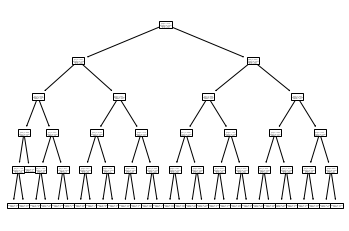

In [40]:
from sklearn import tree
tree.plot_tree(regr)

In [41]:
import graphviz 
dot_data = tree.export_graphviz(regr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("rs") 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
dot_data = tree.export_graphviz(regr, out_file=None, 
                     # feature_names=,  
                     # class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Visualize results

In [ ]:
%matplotlib inline

In [ ]:
accuracy_score(y_test_class, y_pred)

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float')# / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':8},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['low','ok','high']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# Yield Improvement
scrap_old= (len(y_test)-len(y_test[y_test==1]))/len(y_test)
yield_old = 1 - scrap_old

scrap_new = (len(y_test)-len(y_test[y_test==1])-matrix[0,0]-matrix[2,2]+matrix[1,0]+matrix[1,2]+matrix[0,2]+matrix[2,0])/len(y_test)
yield_new = 1- scrap_new

yield_impr = yield_new - yield_old
print('yield before:',round(yield_old*100,3),'%')
print('yield after:', round(yield_new*100,3),'%')
print('yield improvement:', round(yield_impr*100,3),'%')